<a href="https://colab.research.google.com/github/amrahmani/Python/blob/main/Python_Ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Construct a PyTorch Multi-Layer Perceptron (MLP) with 2 inputs, a hidden layer of 4 neurons, and a single output, then train it using backpropagation to predict the product of two integer inputs. Train the model on 20 input-output pairs (with inputs ranging from 1 to 6) and test it on 2 new cases.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define the MLP architecture
class ProductMLP(nn.Module):
    def __init__(self):
        super(ProductMLP, self).__init__()
        self.hidden = nn.Linear(2, 4)  # 2 inputs, 4 hidden neurons
        self.output = nn.Linear(4, 1)  # 4 hidden neurons, 1 output

    def forward(self, x):
        x = self.hidden(x)
        x = torch.relu(x)  # Apply ReLU activation to hidden layer
        x = self.output(x)
        return x

# 2. Generate training data
# 20 input-output pairs (inputs ranging from 1 to 6)
# You can change these lists to test different training data
input_pairs_list = [
    [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
    [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6],
    [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6],
    [4, 1], [4, 2] # Only 20 pairs needed
]

output_products_list = [
    1, 2, 3, 4, 5, 6,
    2, 4, 6, 8, 10, 12,
    3, 6, 9, 12, 15, 18,
    4, 8 # Only 20 pairs needed
]


# Convert lists to PyTorch tensors
X_train = torch.tensor(input_pairs_list, dtype=torch.float32)
y_train = torch.tensor(output_products_list, dtype=torch.float32).view(-1, 1) # Reshape for compatibility with output layer

# Instantiate the model
model = ProductMLP()

# 3. Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer with a learning rate of 0.01

# 4. Train the model
num_epochs = 1000 # Number of training iterations

print("Starting training...")
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad() # Clear gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.2f}')

print("Training finished.")

# 5. Test the model on two new cases
# You can change these lists to test different cases
new_input_pairs = [
    [2, 3], # Expected output: 6
    [6, 3]  # Expected output: 18
]

X_test = torch.tensor(new_input_pairs, dtype=torch.float32)

print("\nTesting the model on new cases:")
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation during testing
    test_predictions = model(X_test)
    for i in range(len(new_input_pairs)):
        input_pair = new_input_pairs[i]
        prediction = test_predictions[i]
        expected_output = input_pair[0] * input_pair[1]
        print(f"Input: {input_pair[0]} x {input_pair[1]} = {expected_output}, Predicted: {prediction.item():.2f}")

Starting training...
Epoch [100/1000], Loss: 7.59
Epoch [200/1000], Loss: 6.47
Epoch [300/1000], Loss: 5.28
Epoch [400/1000], Loss: 4.13
Epoch [500/1000], Loss: 3.26
Epoch [600/1000], Loss: 2.78
Epoch [700/1000], Loss: 2.48
Epoch [800/1000], Loss: 2.39
Epoch [900/1000], Loss: 2.36
Epoch [1000/1000], Loss: 2.35
Training finished.

Testing the model on new cases:
Input: 2 x 3 = 6, Predicted: 5.44
Input: 6 x 3 = 18, Predicted: 17.66


Construct a PyTorch Multi-Layer Perceptron (MLP) with 2 inputs, a hidden layer of 4 neurons, and a single output, then train it using backpropagation to predict the subtraction of two integer inputs. Train the model on 20 input-output pairs (with inputs ranging from 1 to 6) and test it on 10 new cases.

In [ ]:
import torch
import torch.nn as nn

# Define the multi-layer perceptron model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Define the hidden layer with 3 neurons and input size 2
        self.hidden = nn.Linear(2, 3)
        # Define the output layer with 1 neuron
        self.output = nn.Linear(3, 1)

    def forward(self, x):
        # Apply LeakyReLU activation function to the hidden layer output
        # LeakyReLU helps prevent "dying ReLUs" by allowing a small gradient for negative inputs
        x = nn.functional.leaky_relu(self.hidden(x)) # Using nn.functional for LeakyReLU
        # The output layer directly outputs the result without an activation (for regression)
        x = self.output(x)
        return x

# Corrected Dataset for Subtruction Prediction
dataset_list = [
    ((1, 1), 1 - 1), ((1, -2), 1 + 2), ((4, 3), 4 - 3), ((1, 4), 1 - 4),
    ((4, 4), 4 - 4), ((-1, 4), -1 - 4), ((3, 1), 3 - 1), ((-2, 2), -2 - 2),
    ((3, 3), 3 - 3), ((4, 4), 4 - 4), ((3, 4), 3 - 4), ((3, 2), 3 - 2),
    ((5, 1), 5 - 1), ((2, 2), 2 - 2), ((5, -3), 5 + 3), ((2, 4), 2 - 4),
    ((5, 5), 5 - 5), ((5, 4), 5 - 4), ((2, 1), 2 - 1), ((6, 2), 6 - 2),
    ((-2, 3), -2 - 3), ((6, 4), 6 - 4), ((2, 2), 2 - 2), ((2, 6), 2 - 6)
]


# Convert data into torch tensors
inputs = torch.tensor([data[0] for data in dataset_list], dtype=torch.float32)
targets = torch.tensor([data[1] for data in dataset_list], dtype=torch.float32).view(-1, 1)


# Model, Loss function, and Optimizer
model = MLP()
criterion = nn.MSELoss()
# **Crucial Change:** Reduce learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Reduced learning rate to 0.001

# Training loop
epochs = 10000 # Increased epochs slightly for potential better convergence with lower LR
print("Starting training...")
for epoch in range(epochs):
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training finished.")

# Testing
test_data = [(1, -3), (1, 2), (1, 3), (3, 2), (-2, 1), (2, 2), (-3, 3), (3, 4), (5, 1), (2, 6)]

print("\nTesting the model on new cases:")
model.eval()
with torch.no_grad():
    for input_data in test_data:
        input_tensor = torch.tensor(input_data, dtype=torch.float32)
        prediction = model(input_tensor).item()
        expected_output = input_data[0] * input_data[1]
        print(f'Input: {input_data}, Expected Output: {expected_output}, Predicted Output: {prediction:.2f}')

Starting training...
Epoch [1000/10000], Loss: 0.1461
Epoch [2000/10000], Loss: 0.0941
Epoch [3000/10000], Loss: 0.0572
Epoch [4000/10000], Loss: 0.0118
Epoch [5000/10000], Loss: 0.0016
Epoch [6000/10000], Loss: 0.0005
Epoch [7000/10000], Loss: 0.0002
Epoch [8000/10000], Loss: 0.0001
Epoch [9000/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000
Training finished.

Testing the model on new cases:
Input: (1, -3), Expected Output: -3, Predicted Output: 4.00
Input: (1, 2), Expected Output: 2, Predicted Output: -1.01
Input: (1, 3), Expected Output: 3, Predicted Output: -2.01
Input: (3, 2), Expected Output: 6, Predicted Output: 1.00
Input: (-2, 1), Expected Output: -2, Predicted Output: -3.00
Input: (2, 2), Expected Output: 4, Predicted Output: 0.00
Input: (-3, 3), Expected Output: -9, Predicted Output: -5.99
Input: (3, 4), Expected Output: 12, Predicted Output: -1.00
Input: (5, 1), Expected Output: 5, Predicted Output: 4.00
Input: (2, 6), Expected Output: 12, Predicted Output: -4.00


**Task 1:** Sketch an MLP architecture for MNIST. Input: 784 pixels (28x28); hidden: 128 neurons; output: 10 classes (0-9). Code its structure in PyTorch. Code data loading and preprocessing. Submit code and digit plots.

**Task 2:** Implement the MLP class as shown for MNIST classification. Use PyTorch’s nn.Module.

**Task 3:** Train the MLP on MNIST for 5 epochs using the provided code.

**Task 4:** Evaluate the trained MLP on MNIST test data. Compute accuracy and visualize predictions.

Using device: cuda

Initial Data Check:
Batch shape (images): torch.Size([64, 1, 28, 28])
Batch shape (labels): torch.Size([64])


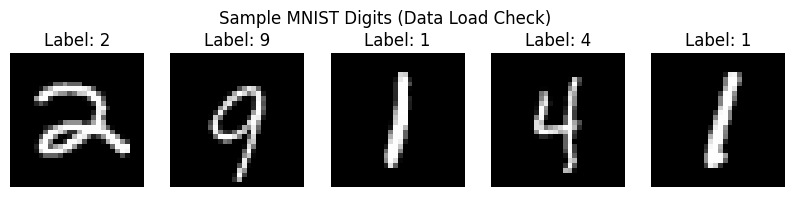


MLP Model Architecture:
MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

--- Starting Training for 5 Epochs ---
Epoch [1/5], Average Training Loss: 0.3368
Epoch [2/5], Average Training Loss: 0.1392
Epoch [3/5], Average Training Loss: 0.0958
Epoch [4/5], Average Training Loss: 0.0718
Epoch [5/5], Average Training Loss: 0.0565

Model training complete. Model saved to 'mnist_mlp_model.pth'
Model successfully loaded for evaluation from 'mnist_mlp_model.pth'

--- Evaluating Model on Test Data ---
Accuracy of the MLP on the 10,000 test images: 97.66%

--- Visualizing 10 Test Images with Predictions ---


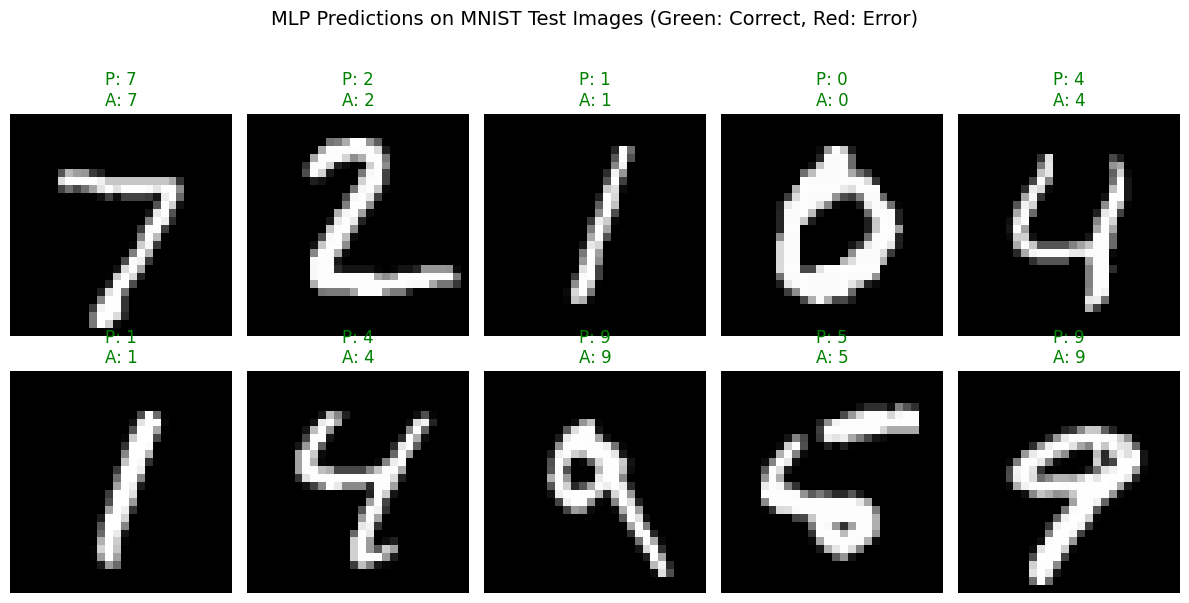


Full training and evaluation pipeline complete.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os # For creating data directory

# --- 1. MLP Class Definition ---
# This defines the architecture of our Multi-Layer Perceptron.
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Input layer: 784 neurons (for a flattened 28x28 image)
        self.fc1 = nn.Linear(784, 128)
        # First hidden layer: 128 neurons, fully connected
        self.fc2 = nn.Linear(128, 64)
        # Second hidden layer: 64 neurons, fully connected
        self.fc3 = nn.Linear(64, 10) # Output layer: 10 neurons (for 10 digit classes)

    def forward(self, x):
        # Flatten the input image from (batch_size, 1, 28, 28) to (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # Apply the first fully connected layer followed by ReLU activation
        x = torch.relu(self.fc1(x))
        # Apply the second fully connected layer followed by ReLU activation
        x = torch.relu(self.fc2(x))
        # Apply the final fully connected layer.
        # No activation here, as nn.CrossEntropyLoss implicitly handles softmax.
        x = self.fc3(x)
        return x

# --- Configuration and Device Setup ---
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 5
model_save_path = 'mnist_mlp_model.pth' # Path to save/load the trained model

# Ensure the data directory exists
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

# --- 2. Data Loading and Preprocessing ---
# Define a transform to normalize the data to [0, 1] and convert to a PyTorch Tensor
# transforms.ToTensor() automatically scales pixel values from [0, 255] to [0.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the MNIST training and test datasets
# root='./data' specifies where to store the downloaded dataset
# train=True for the training set, train=False for the test set
# download=True ensures that the dataset is downloaded if not already present
# transform=transform applies the defined transformations to the loaded images
train_dataset = torchvision.datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

# Create DataLoaders for efficient batch processing
# batch_size: number of samples per batch to load
# shuffle=True for the training data to randomize the order of samples in each epoch,
# which helps in preventing the model from getting stuck in local minima.
# shuffle=False for the test data as order doesn't matter for evaluation.
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# --- Initial Data Validation (Optional but good practice) ---
# Get one batch of training data to inspect its shape and content
# iter(train_loader) creates an iterator from the DataLoader
# next() retrieves the next item from the iterator, which is a batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(f"\nInitial Data Check:")
print(f"Batch shape (images): {images.shape}") # Expected: [batch_size, 1, 28, 28]
print(f"Batch shape (labels): {labels.shape}") # Expected: [batch_size]

# Visualize 5 sample digits from the training batch
fig_data_check, axes_data_check = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    # images[i] selects the i-th image from the batch
    # .cpu() moves the tensor to CPU if it's on GPU (matplotlib works with CPU tensors/numpy arrays)
    # .numpy() converts the PyTorch tensor to a NumPy array
    # .squeeze() removes single-dimensional entries from the shape of an array.
    # For MNIST images, shape is [1, 28, 28]. squeeze() makes it [28, 28] for imshow.
    img = images[i].cpu().numpy().squeeze()
    axes_data_check[i].imshow(img, cmap='gray')
    axes_data_check[i].set_title(f"Label: {labels[i].item()}")
    axes_data_check[i].axis('off')
plt.suptitle('Sample MNIST Digits (Data Load Check)', y=1.05)
plt.show()

# --- 3. Model, Loss Function, and Optimizer Setup ---
model = MLP().to(device) # Instantiate the MLP model and move it to the configured device
print("\nMLP Model Architecture:")
print(model)

# Define the Loss Function
# nn.CrossEntropyLoss is suitable for multi-class classification.
# It internally applies a softmax to the model's output (logits) and then computes the negative log likelihood.
criterion = nn.CrossEntropyLoss()

# Define the Optimizer
# optim.Adam is a popular adaptive learning rate optimization algorithm.
# model.parameters() provides all the learnable parameters (weights and biases) of the model.
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- 4. Training Loop ---
print(f"\n--- Starting Training for {num_epochs} Epochs ---")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode (enables dropout, batchnorm updates)
    running_loss = 0.0 # To accumulate loss over batches in an epoch

    # Iterate over batches of training data
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move images and labels to the specified device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # 1. Forward pass: compute model's output (logits)
        outputs = model(images)

        # 2. Calculate the loss between predicted outputs and true labels
        loss = criterion(outputs, labels)

        # 3. Backward pass: compute gradients and update weights
        optimizer.zero_grad() # Clear gradients from the previous step
        loss.backward()       # Perform backpropagation to compute gradients of the loss w.r.t. model parameters

        # 4. Update weights: Adjust model parameters using the optimizer
        optimizer.step()      # Update model parameters using the optimizer

        # Accumulate the loss for monitoring
        running_loss += loss.item() # .item() gets the scalar value from a PyTorch tensor

    # Calculate and print the average loss for the current epoch
    # len(train_loader) gives the number of batches in the training set
    avg_loss_epoch = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_loss_epoch:.4f}")

# --- 5. Save the Trained Model ---
# Save only the model's learnable parameters (state_dict), which is the recommended practice
torch.save(model.state_dict(), model_save_path)
print(f"\nModel training complete. Model saved to '{model_save_path}'")

# --- 6. Load Model for Evaluation (Optional: demonstrating load functionality) ---
# If you were to run evaluation in a separate script, you'd start from here.
# For this combined script, the trained model is already in memory, but this shows how to load it.
loaded_model = MLP() # Create a fresh instance of the model architecture
try:
    loaded_model.load_state_dict(torch.load(model_save_path, map_location=device))
    print(f"Model successfully loaded for evaluation from '{model_save_path}'")
except FileNotFoundError:
    print(f"Error: Model file '{model_save_path}' not found for loading.")
    exit() # Exit if model not found for evaluation

loaded_model.to(device) # Move the loaded model to the evaluation device
loaded_model.eval() # Set the model to evaluation mode

# --- 7. Evaluate Accuracy on Test Data ---
print("\n--- Evaluating Model on Test Data ---")
correct_predictions = 0
total_samples = 0

# Disable gradient calculation during inference for efficiency
# This saves memory and speeds up computations because we don't need gradients for evaluation.
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = loaded_model(images) # Get model outputs
         # Get the predicted class (index of the highest logit). torch.max returns (max_value, argmax_index).
        # We are interested in the index (the predicted class), so we use `_` for the max_value.
        # The `1` indicates that we want the max along dimension 1 (the class dimension).
        _, predicted = torch.max(outputs.data, 1)

        total_samples += labels.size(0) # Accumulate total samples
        # Update correct predictions count
        # (predicted == labels) creates a boolean tensor, .sum() counts True values,
        # and .item() converts the single-element tensor to a Python number.
        correct_predictions += (predicted == labels).sum().item() # Count correct predictions

accuracy = 100 * correct_predictions / total_samples
print(f"Accuracy of the MLP on the 10,000 test images: {accuracy:.2f}%")

# --- 8. Visualize Predictions on Test Data ---
print("\n--- Visualizing 10 Test Images with Predictions ---")

# Get one fresh batch of test data for visualization
dataiter = iter(test_loader)
images_to_plot, labels_to_plot = next(dataiter)

# Move these images to the device for prediction
images_to_plot_on_device = images_to_plot.to(device)

# Get predictions for these images
with torch.no_grad(): # Ensure no gradients are computed for visualization
    outputs_to_plot = model(images_to_plot_on_device)
    # Get the predicted class (index with highest logit)
    _, predicted_to_plot = torch.max(outputs_to_plot.data, 1)

# Set up the plot for 10 images (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten() # Flatten the 2x5 array of axes objects for easy indexing

# Iterate through the first 10 images in the batch
for i in range(10):
    # Prepare the image for plotting: move to CPU, convert to NumPy, remove channel dim
    img = images_to_plot[i].cpu().numpy().squeeze()
    true_label = labels_to_plot[i].item() # Get the actual label as a Python number
    predicted_label = predicted_to_plot[i].item() # Get the predicted label as a Python number

    # Display the image
    axes[i].imshow(img, cmap='gray')

    # Set title with predicted (P) and actual (A) labels, color-coded for correctness
    color = 'green' if predicted_label == true_label else 'red' # Green for correct, Red for error
    axes[i].set_title(f"P: {predicted_label}\nA: {true_label}", color=color, fontsize=12)
    axes[i].axis('off') # Hide axes ticks and labels for cleaner image display

# Add a main title for the entire figure
plt.suptitle('MLP Predictions on MNIST Test Images (Green: Correct, Red: Error)', y=1.02, fontsize=14)
# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.98])
# Display the plot
plt.show()

print("\nFull training and evaluation pipeline complete.")